<h2><b>Optimización de Portafolios de Markowitz</b></h2>
<h4>Juan David Rincón, Mayo 2023</h4>

In [1]:
# Librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy

In [20]:
# Parámetros iniciales.
stocks = ["INTC", "JNJ", "JPM", "KO", "PFE", "PG", "PYPL", "TSLA", "XOM"]
start_date = "2015-01-01"
end_date = "2022-12-31"
risk_free_ticker = "^IRX"
num_assets = len(stocks)
numberSim = 25000

In [21]:
# Extraer datos activos.
prices_df = yf.download(stocks, start=start_date, end=end_date, interval="1Mo")['Adj Close']
print(prices_df.head())

[*********************100%***********************]  9 of 9 completed
                 INTC        JNJ        JPM         KO        PFE         PG  \
Date                                                                           
2015-01-01  25.865948  79.594849  42.841724  31.602777  21.737423  66.042259   
2015-02-01  26.030357  81.478592  48.588261  33.237812  23.872911  67.174797   
2015-03-01  24.655863  80.520180  48.033234  31.126862  24.413322  64.657623   
2015-04-01  25.665121  79.399628  50.158173  31.392893  23.809837  62.740135   
2015-05-01  27.171118  80.152008  52.502911  31.702480  24.385252  62.353924   

            PYPL       TSLA        XOM  
Date                                    
2015-01-01   NaN  13.573333  59.490498  
2015-02-01   NaN  13.556000  60.252686  
2015-03-01   NaN  12.584667  58.279045  
2015-04-01   NaN  15.070000  59.903999  
2015-05-01   NaN  16.719999  58.416176  


In [22]:
# Extraer tasa libre de riesgo.
risk_free = yf.Ticker(risk_free_ticker).info["regularMarketPreviousClose"]
risk_free /= 100
print(risk_free)

0.050950002999999994


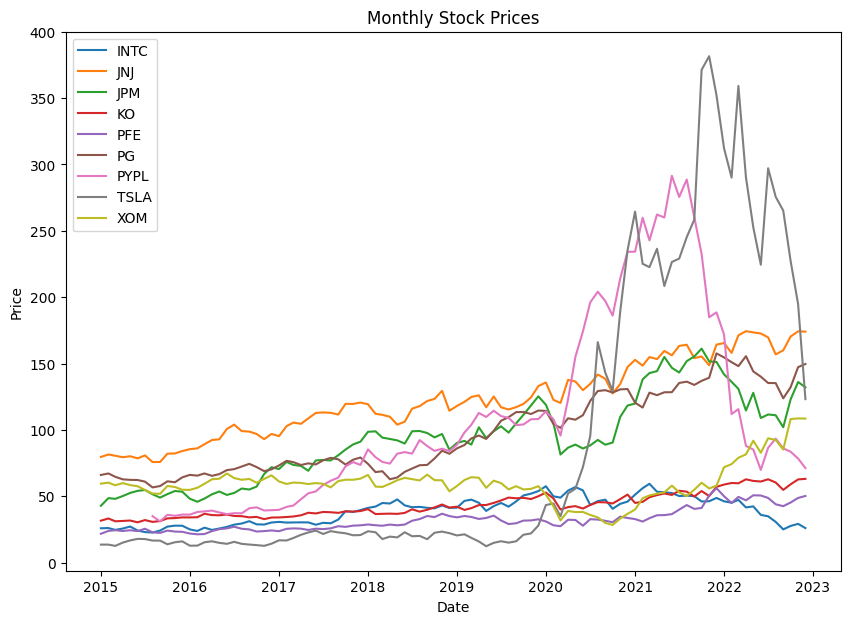

In [24]:
# Gráfica precios.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(prices_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Monthly Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

In [25]:
# Retornos mensuales.
returns_df = prices_df.pct_change().dropna()
print(returns_df.head())

# Retornos promedio.
mean_returns = np.array(returns_df.mean())
print(mean_returns)

                INTC       JNJ       JPM        KO       PFE        PG  \
Date                                                                     
2015-09-01  0.064835  0.000895 -0.048830  0.020346 -0.017522  0.017971   
2015-10-01  0.123424  0.082271  0.053797  0.064728  0.076727  0.061718   
2015-11-01  0.026875  0.002078  0.045309  0.006376 -0.031047 -0.011356   
2015-12-01 -0.002224  0.022099 -0.009748  0.015708 -0.007002  0.061064   
2016-01-01 -0.099565  0.016744 -0.098895 -0.000931 -0.055452  0.028711   

                PYPL      TSLA       XOM  
Date                                      
2015-09-01 -0.113143 -0.002650 -0.002583  
2015-10-01  0.160116 -0.166948  0.112845  
2015-11-01 -0.020828  0.112743 -0.013053  
2015-12-01  0.026659  0.042343 -0.037111  
2016-01-01 -0.001657 -0.203367 -0.001283  
[0.0044901  0.0105659  0.01342438 0.00942788 0.01110963 0.01210094
 0.01305966 0.03837802 0.01199897]


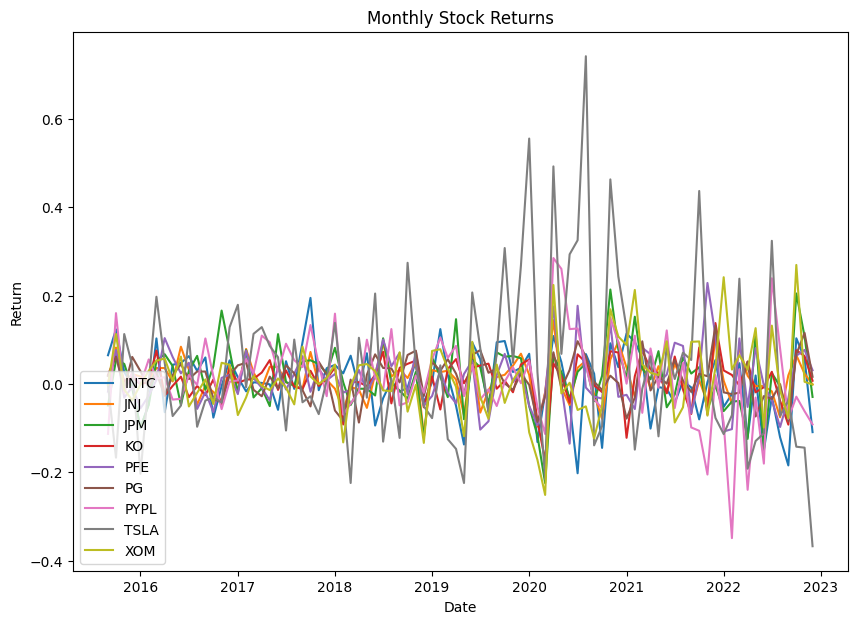

In [26]:
# Gráfica retornos.
plt.figure(figsize=(10,7))

for i in range(num_assets):
  plt.plot(returns_df.iloc[:,i], label = f"{stocks[i]}")

plt.title('Monthly Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return')

plt.legend(loc="lower left")
plt.show()

In [27]:
# Inversión individual en los activos.
stocks_return = (1+mean_returns)**(12)-1
stocks_risk = np.std(returns_df)*np.sqrt(12)

indv_all = pd.DataFrame({"Annualized Return" : np.round(stocks_return*100, 2),
                         "Annualized Risk" : np.round(stocks_risk*100, 2)})


print("-"*80)
print("Individual Allocation")
print("\n")
print(indv_all.T)
print("-"*80)

--------------------------------------------------------------------------------
Individual Allocation


                    INTC    JNJ    JPM     KO    PFE     PG   PYPL   TSLA  \
Annualized Return   5.52  13.44  17.35  11.92  14.18  15.53  16.85  57.13   
Annualized Risk    26.16  16.06  25.30  16.77  22.73  15.58  33.95  64.43   

                     XOM  
Annualized Return  15.39  
Annualized Risk    29.63  
--------------------------------------------------------------------------------


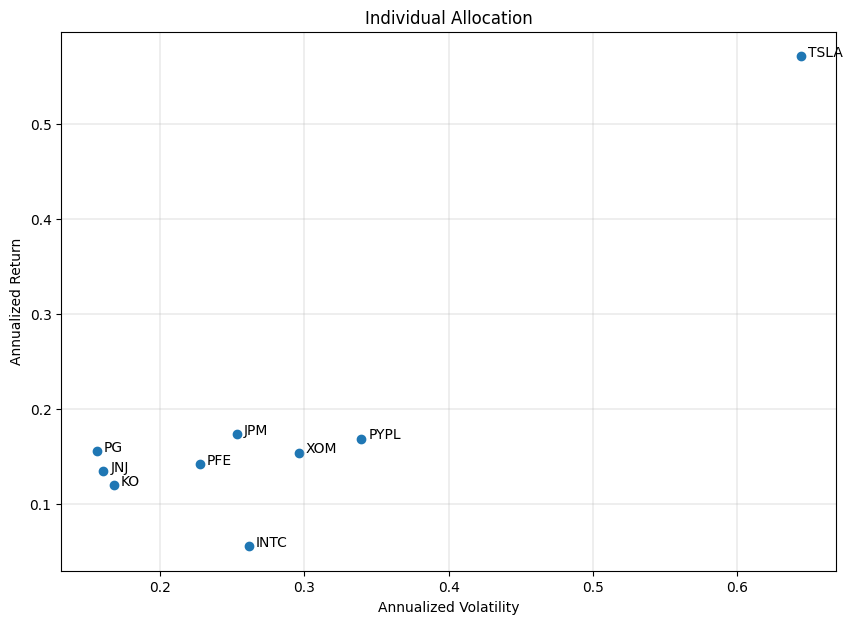

In [28]:
# Gráfica activos individuales.
plt.figure(figsize=(10,7))
plt.scatter(stocks_risk, stocks_return)

for i, name in enumerate(stocks):
    plt.annotate(name, (stocks_risk[i], stocks_return[i]), xytext=(5,0), textcoords='offset points')

plt.title('Individual Allocation')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.show()

In [29]:
# Simular portafolios.
weights = pd.DataFrame(np.nan, index=range(numberSim), columns=stocks)

for i in range(numberSim):
  random_numbers = np.array([random.random() for _ in range(returns_df.shape[1])])
  sum_rand_numbers = sum(random_numbers)

  weights.iloc[i,:] = random_numbers/sum_rand_numbers

print(weights)

           INTC       JNJ       JPM        KO       PFE        PG      PYPL  \
0      0.063535  0.115935  0.155867  0.151120  0.132155  0.064242  0.165451   
1      0.047015  0.135704  0.174225  0.201439  0.080405  0.113775  0.000047   
2      0.130199  0.162522  0.072063  0.122063  0.036644  0.206824  0.018251   
3      0.174789  0.096340  0.092399  0.116063  0.122363  0.168660  0.052167   
4      0.077439  0.029146  0.027521  0.127777  0.218753  0.190458  0.017055   
...         ...       ...       ...       ...       ...       ...       ...   
24995  0.153680  0.086585  0.125889  0.084879  0.176097  0.092045  0.168136   
24996  0.128612  0.079899  0.104360  0.055933  0.068981  0.183017  0.170006   
24997  0.033154  0.135220  0.201498  0.207901  0.074715  0.219383  0.012924   
24998  0.158331  0.160853  0.161950  0.002311  0.067597  0.217440  0.086468   
24999  0.060113  0.109415  0.064846  0.071127  0.187795  0.202365  0.168423   

           TSLA       XOM  
0      0.025342  0.1263

In [30]:
# Matriz de Varianza Covarianza.
cov_matrix = np.cov(returns_df, rowvar=False)

# Desviaciones estándar por activo.
stdev_assets = np.sqrt(np.diagonal(cov_matrix))

In [32]:
# Función para calcular rentabilidad de los portafolios (Anual).
def rent_Portfolios_f(weights, mean_returns):
  rtrn1 = np.dot(mean_returns, weights)
  rtrn1 = (1 + rtrn1)**(12)-1
  return rtrn1

# Función para calcular riesgo de los portafolios (Anual).
def risk_Portfolios_f(weights, varcov):
  risk1 = np.dot(weights.T, np.dot(varcov, weights))
  risk1 = np.sqrt(risk1*12)
  return risk1

# Función para calcular Sharpe Ratio.
def sharpe_ratio_f(rent, risk_free, risk):
  sr1 = (rent - risk_free)/risk
  return sr1

In [33]:
# Retornos y riesgo portafolios (Anual).
results_portfolios = pd.DataFrame(np.nan, index=range(numberSim), columns=["Rtrn", "Std Dev", "Sharpe Ratio"])

for i in range(numberSim):
  results_portfolios.iloc[i,0] = rent_Portfolios_f(weights=weights.iloc[i,:], mean_returns=mean_returns)
  results_portfolios.iloc[i,1] = risk_Portfolios_f(weights=weights.iloc[i,:], varcov=cov_matrix)
  results_portfolios.iloc[i,2] = sharpe_ratio_f(rent=results_portfolios.iloc[i,0], risk_free=risk_free, risk=results_portfolios.iloc[i,1])

print(results_portfolios)

           Rtrn   Std Dev  Sharpe Ratio
0      0.152833  0.157140      0.648358
1      0.199330  0.176097      0.842606
2      0.181440  0.163512      0.798046
3      0.156748  0.151281      0.699351
4      0.226567  0.205469      0.854712
...         ...       ...           ...
24995  0.163424  0.165180      0.680919
24996  0.162170  0.161981      0.686622
24997  0.159371  0.140881      0.769593
24998  0.190991  0.175912      0.796088
24999  0.164444  0.150897      0.752126

[25000 rows x 3 columns]


In [34]:
# Portafolio de Mínima Varianza.
min_var_index = np.argmin(results_portfolios["Std Dev"])
min_var_rent = results_portfolios.iloc[min_var_index, 0]
min_var_risk = results_portfolios.iloc[min_var_index, 1]
min_var_sr = results_portfolios.iloc[min_var_index, 2]

# Portafolio de Máxima Eficiencia.
max_sr_index = np.argmax(results_portfolios["Sharpe Ratio"])
max_sr_rent = results_portfolios.iloc[max_sr_index, 0]
max_sr_risk = results_portfolios.iloc[max_sr_index, 1]
max_sr_sr = results_portfolios.iloc[max_sr_index, 2]

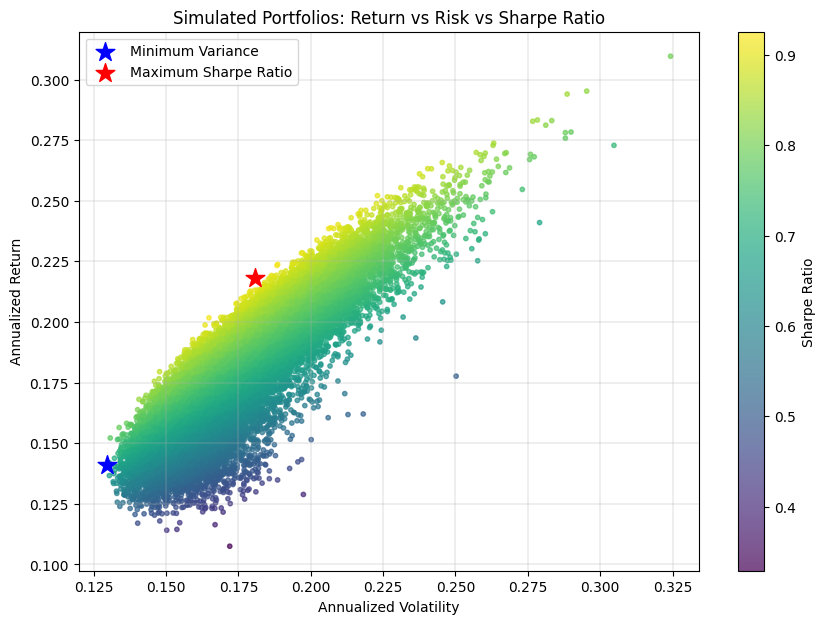

In [35]:
# Gráfica portafolios.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.scatter(min_var_risk, min_var_rent, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk, max_sr_rent, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Simulated Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [36]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr = pd.DataFrame(weights.iloc[min_var_index], index=stocks)
pond_min_vr.columns = ["Allocation"]
pond_min_vr.Allocation = [round(i*100, 2) for i in pond_min_vr.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr, 2)}")
print("\n")
print(pond_min_vr.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr = pd.DataFrame(weights.iloc[max_sr_index], index=stocks)
pond_max_sr.columns = ["Allocation"]
pond_max_sr.Allocation = [round(i*100, 2) for i in pond_max_sr.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr, 2)}")
print("\n")
print(pond_max_sr.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 14.1
Annualized Risk: 12.96
Sharpe Ratio: 0.69


            INTC    JNJ  JPM     KO   PFE     PG  PYPL  TSLA   XOM
Allocation  7.17  25.85  7.4  19.23  5.25  26.89  2.28  1.31  4.62
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 21.82
Annualized Risk: 18.06
Sharpe Ratio: 0.93


            INTC   JNJ   JPM     KO    PFE     PG  PYPL   TSLA   XOM
Allocation   0.3  9.67  11.1  11.06  10.69  28.47  3.29  18.58  6.85
--------------------------------------------------------------------------------


In [37]:
# Minimización de Varianza.
def min_variance_f(varcov):
    number_assets = varcov.shape[0]
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Máximización de Sharpe Ratio.
def max_sharpe_ratio_f(mean_returns, varcov, risk_free):
    
    def auxiliar1(weights, mean_returns, varcov, risk_free):
        a = rent_Portfolios_f(weights=weights, mean_returns=mean_returns)
        b = risk_Portfolios_f(weights=weights, varcov=varcov)
        c = -((a - risk_free)/b)

        return c
    
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (mean_returns, varcov, risk_free)
    constraints = ({"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(auxiliar1, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x

# Calculo Frontera eficiente.
def efficient_frontier_f(mean_returns, varcov, target):
    number_assets = len(mean_returns)
    initial_point = number_assets*[1/number_assets]

    args = (varcov)
    constraints = ({"type" : "eq", "fun" : lambda x: rent_Portfolios_f(x, mean_returns) - target},
                   {"type" : "eq", "fun" : lambda x: np.sum(x) - 1})
    bounds = tuple((0.0, 1.0) for asset in range(number_assets))

    result = scipy.optimize.minimize(risk_Portfolios_f, initial_point, args=args,
                                     method="SLSQP", bounds=bounds, constraints=constraints)
    
    return result.x    


In [38]:
# Portafolio de Mínima Varianza (Optimización).
weights_min_var_clc = min_variance_f(cov_matrix)
min_var_rent_clc = rent_Portfolios_f(weights_min_var_clc, mean_returns)
min_var_risk_clc = risk_Portfolios_f(weights_min_var_clc, cov_matrix)
min_var_sr_clc = sharpe_ratio_f(min_var_rent_clc, risk_free, min_var_risk_clc)

# Portafolio de Máxima Eficiencia (Optimización).
weights_max_sr_clc = max_sharpe_ratio_f(mean_returns, cov_matrix, risk_free)
max_sr_rent_clc = rent_Portfolios_f(weights_max_sr_clc, mean_returns)
max_sr_risk_clc = risk_Portfolios_f(weights_max_sr_clc, cov_matrix)
max_sr_sr_clc = sharpe_ratio_f(max_sr_rent_clc, risk_free, max_sr_risk_clc)

# Frontera eficiente.
rent_targets = np.linspace(min_var_rent_clc, np.max(results_portfolios['Std Dev']), 100)

frontier_rent_clc = []
frontier_risk_clc = []
for i in rent_targets:
    weights_clc = efficient_frontier_f(mean_returns, cov_matrix, i)
    frontier_rent_clc.append(rent_Portfolios_f(weights_clc, mean_returns))
    frontier_risk_clc.append(risk_Portfolios_f(weights_clc, cov_matrix))

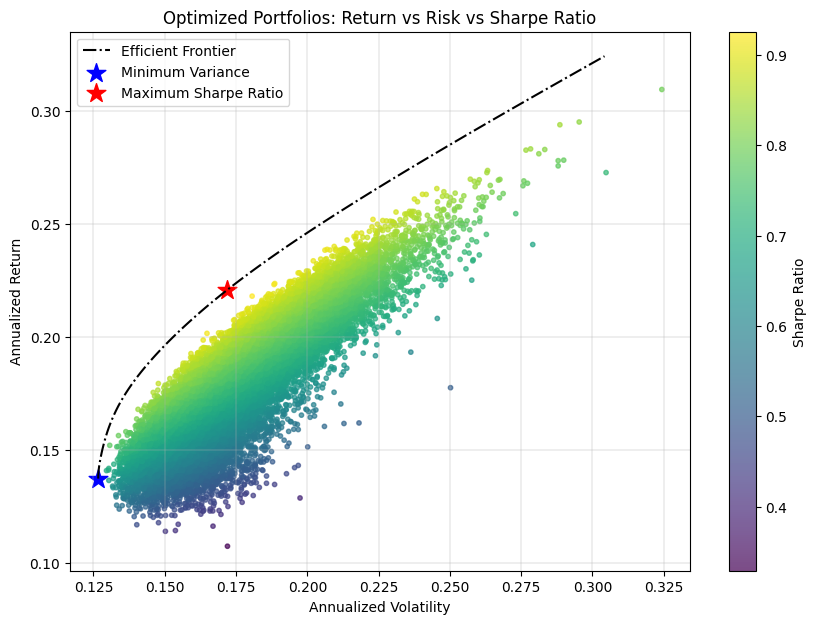

In [39]:
# Gráfica portafolios y frontera eficiente.
plt.figure(figsize=(10,7))
plt.scatter(results_portfolios["Std Dev"], results_portfolios["Rtrn"], c=results_portfolios["Sharpe Ratio"], alpha=0.7, s=10)
plt.colorbar().set_label("Sharpe Ratio")

plt.plot(frontier_risk_clc, frontier_rent_clc, linestyle = "-.", color = "black", label = "Efficient Frontier")

plt.scatter(min_var_risk_clc, min_var_rent_clc, marker='*', s=200, color="blue", label="Minimum Variance")
plt.scatter(max_sr_risk_clc, max_sr_rent_clc, marker='*', s=200, color="red", label="Maximum Sharpe Ratio")

plt.title('Optimized Portfolios: Return vs Risk vs Sharpe Ratio')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Return')

plt.grid(True, linewidth=0.3)
plt.legend()
plt.show()

In [40]:
print("-"*80)

# Ponderaciones Portafolio de Mínima Varianza.
pond_min_vr_clc = pd.DataFrame(weights_min_var_clc, index=stocks)
pond_min_vr_clc.columns = ["Allocation"]
pond_min_vr_clc.Allocation = [round(i*100, 2) for i in pond_min_vr_clc.Allocation]
print("Minimum Variance Portfolio")
print("\n")
print(f"Annualized Return: {round(min_var_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(min_var_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(min_var_sr_clc, 2)}")
print("\n")
print(pond_min_vr_clc.T)

print("-"*80)

# Ponderaciones Portafolio de Máxima Eficiencia.
pond_max_sr_clc = pd.DataFrame(weights_max_sr_clc, index=stocks)
pond_max_sr_clc.columns = ["Allocation"]
pond_max_sr_clc.Allocation = [round(i*100, 2) for i in pond_max_sr_clc.Allocation]
print("Maximum Efficiency Portfolio")
print("\n")
print(f"Annualized Return: {round(max_sr_rent_clc*100, 2)}")
print(f"Annualized Risk: {round(max_sr_risk_clc*100, 2)}")
print(f"Sharpe Ratio: {round(max_sr_sr_clc, 2)}")
print("\n")
print(pond_max_sr_clc.T)
print("-"*80)

--------------------------------------------------------------------------------
Minimum Variance Portfolio


Annualized Return: 13.74
Annualized Risk: 12.67
Sharpe Ratio: 0.68


            INTC    JNJ   JPM     KO   PFE     PG  PYPL  TSLA   XOM
Allocation  7.58  20.35  4.97  16.66  8.21  37.58  4.11   0.0  0.54
--------------------------------------------------------------------------------
Maximum Efficiency Portfolio


Annualized Return: 22.1
Annualized Risk: 17.2
Sharpe Ratio: 0.99


            INTC  JNJ    JPM   KO   PFE     PG  PYPL   TSLA   XOM
Allocation   0.0  0.0  15.12  0.0  2.49  60.46   0.0  17.15  4.78
--------------------------------------------------------------------------------


In [ ]:
# Juan David Rincón, Mayo 2023.